## Lab Assignment 2 


### Student ID: 220002252

#### Link to GitHub - 

In [7]:
from arcgis.gis import GIS
gis = GIS("home")

### Part 1: Python Basics

#### Task 1 - 
Create an If...Else statement that will test whether a number is divisible by three. "YOUR 
VALUE is divisible by 3" should be printed if the value is divisible by three. "YOUR VALUE is not 
divisible by three" should be printed if it is not divisible by three. Test the statement on a numeric 
variable. Upper case text in the print statement should be replaced with the tested number.

In [2]:
x = 15
if x / 3:
    print(str(x) + " is divisible by 3.")
else:
    print(str(x) + " is not divisible by 3.")

15 is divisible by 3.


#### Task 2 - 
Create an If...Else statement that will test whether a type of fruit, represented as a text string, 
is in a list of acceptable fruits (apple, orange, pear, kiwi, or strawberry). If the fruit is on the list, the following should be printed: "YOUR FRUIT is acceptable." If not, then the following should be printed: "YOUR FRUIT is not acceptable." Upper case text in the print statement should be replaced 
with the tested fruit.

In [10]:
x = input("Enter a fruit:")
fruit = ["Apple", "apple", "Orange", "orange", "Pear", "pear", "Kiwi", "kiwi", "Strawberry", "strawberry"]
if x in fruit:
    print(x + " is acceptable.")
else:
    print(x + " is not acceptable.")

Enter a fruit: kiwi


kiwi is acceptable.


#### Task 3 -
Create a function to calculate the distance between two coordinates using the haversine 
formula. Write the following formula where the input parameters are a pair of coordinates as two 
lists.
The Haversine formula is the first equation to consider when calculating distances on a sphere. 
The word "Haversine" comes from the function:
                                        haversine(θ) = sin²(θ/2)
The following equation where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 
6,371km) is how we translate the above formula to include latitude and longitude coordinates (A 
and B are the pair of coordinates). Note that angles need to be in radians to pass to trig 
functions:
                a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)
                c = 2 * atan2( √a, √(1−a) )
                d = R ⋅ c


In [11]:
import math

In [12]:


haversine(θ) = sin²(θ/2)

a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)
c = 2 * atan2( √a, √(1−a) )
d = R ⋅ c


SyntaxError: invalid character '²' (U+00B2) (164104177.py, line 1)

### Part 2: Pandas and NumPy

##### Q1: How many trees areof the Quercus or Acer genus?

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import seaborn as sns

In [13]:
dataset = '/arcgis/home/assignment2/portland_park_trees.csv'

In [14]:
simd = pd.read_csv('/arcgis/home/assignment2/portland_park_trees.csv', header=0)
simd.columns =[column.replace(" ", "_") for column in simd.columns] 
simd.tail(5)

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
25529,25530,726046,2018/08/16,QURU,31.6,Fair,74.0,50.0,46.0,volunteer,...,Quercus,northern red oak,Quercus rubra,BD,L,No,NaN,NaN,North America - eastern Canada and eastern USA...,Acorns take two years to mature and are an imp...
25530,25531,726443,2019/10/11,PSME,0.4,Good,8.0,6.0,6.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
25531,25532,726444,2019/10/11,MEGL,26.3,Fair,79.0,30.0,40.0,staff,...,Metasequoia,dawn redwood,Metasequoia glyptostroboides,CD,L,No,NaN,NaN,Asia - central China,"A deciduous conifer, dawn redwood is Oregon's ..."
25532,25533,726445,2019/10/11,PCSI,8.8,Fair,43.0,20.0,20.0,staff,...,Picea,Sitka spruce,Picea sitchensis,CE,L,Yes,NaN,NaN,North America - Alaska south to British Columb...,"Green, 1"" long, typically flat needles are the..."
25533,25534,726446,2019/10/11,COKO,2.0,Good,18.0,13.0,13.0,staff,...,Cornus,kousa dogwood,Cornus kousa,BD,S,No,NaN,NaN,"Asia - Japan, Korea",A 20-30' tree with showy white flower bracts t...


In [15]:
simd.columns

Index(['fid', 'OBJECTID', 'Inventory_', 'Species', 'DBH', 'Condition',
       'TreeHeight', 'CrownWidth', 'CrownWid_1', 'CollectedB', 'Notes',
       'CrownBaseH', 'GlobalID', 'StaffRevie', 'created_us', 'created_da',
       'last_edite', 'last_edi_1', 'UserID', 'Structural', 'Carbon_Sto',
       'Carbon_S_1', 'Carbon_Seq', 'Carbon_S_2', 'Stormwater', 'Stormwat_1',
       'Pollution_', 'Pollutio_1', 'Total_Annu', 'Family', 'Genus',
       'Common_nam', 'Genus_spec', 'Functional', 'Size', 'Native', 'Edible',
       'Nuisance', 'Origin', 'Species_fa'],
      dtype='object')

In [16]:
simd.shape

(25534, 40)

In [17]:
simdQ = simd[simd['Genus'] == "Quercus"]
simdQ.shape

(2089, 40)

Therefore, there are 2089 trees that are of the Quercus genus

In [18]:
simdA = simd[simd['Genus'] == "Acer"]
simdA.shape

(3586, 40)

Therefore, there are 3586 trees that are of the Acer genus

In [19]:
simdAQ = simd[(simd['Genus'] == "Quercus") | (simd['Genus'] == "Acer")]
simdAQ.shape

(5675, 40)

Therefore, there are 5675 trees of either the Querus or Acer genus

##### Q2: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [20]:
import pandas as pd

#load the CV file

df = pd.read_csv('/arcgis/home/assignment2/portland_park_trees.csv')

dfAQ = df[(df['Genus'] == "Quercus") | (df['Genus'] == "Acer")]

print(dfAQ.head())

    fid  OBJECTID  Inventory_ Species   DBH Condition  TreeHeight  CrownWidth  \
3     4       429  2017/05/09    QURU  10.3      Poor        28.0        38.0   
11   12       437  2017/05/09    QURU  14.9      Fair        48.0        33.0   
24   25       450  2017/05/15    ACGR   6.6      Fair        19.0        17.0   
25   26       451  2017/05/15    ACGR   6.2      Fair        27.0        14.0   
30   31       456  2017/05/15    ACPL  17.3      Fair        44.0        50.0   

    CrownWid_1 CollectedB  ...    Genus        Common_nam        Genus_spec  \
3         31.0      staff  ...  Quercus  northern red oak     Quercus rubra   
11        27.0      staff  ...  Quercus  northern red oak     Quercus rubra   
24        13.0      staff  ...     Acer   paperbark maple      Acer griseum   
25        14.0      staff  ...     Acer   paperbark maple      Acer griseum   
30        40.0      staff  ...     Acer      Norway maple  Acer platanoides   

   Functional Size Native Edible Nuisa

In [21]:
dfAQ50 = dfAQ.query("DBH > 50")
print(dfAQ50)

         fid  OBJECTID  Inventory_ Species   DBH Condition  TreeHeight  \
127      128       953  2017/05/24    ACMA  50.5      Fair        90.0   
152      153      1754  2017/05/24    ACMA  50.5      Fair        85.0   
154      155      1756  2017/05/24    ACMA  52.7      Fair        94.0   
162      163      2150  2017/05/24    ACMA  56.3      Fair        70.0   
593      594     13044  2017/06/29    ACMA  50.9      Fair        90.0   
...      ...       ...         ...     ...   ...       ...         ...   
23957  23958    684418  2019/09/23    ACMA  59.5      Poor        77.0   
24271  24272    690856  2019/09/25    QUGA  69.9      Good       101.0   
24461  24462    695648  2019/09/27    QUGA  59.0      Fair        94.0   
25499  25500    723643  2019/10/11    ACMA  84.5      Fair        69.0   
25506  25507    724045  2019/10/11    ACMA  63.0      Poor        46.0   

       CrownWidth  CrownWid_1 CollectedB  ...    Genus        Common_nam  \
127          83.0        84.0      

In [22]:
dfAQ50.shape

(124, 40)

Therefore, there are 124 trees of the Quercus or Acer genus that have DBH larger than 50 inches

##### Q3: Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus? 

In [23]:
simdF = simd[simd['Genus'] == "Fraxinus"]

In [24]:
averageF = simdF['DBH'].mean()
print(averageF)

11.033609693877551


In [25]:
averageQ = simdQ['DBH'].mean()
print(averageQ)

23.56823839157492


In [26]:
averageA = simdA['DBH'].mean()
print(averageA)

18.419085331846066


Therefore, the Quercus genus has the highest mean DBH of the Quercus, Acer, and Fraxinus genus trees - with an average DBH of 23.57.

##### Q4: How many different species of trees are recorded in the Acer genus? 

In [27]:
simdA.columns

Index(['fid', 'OBJECTID', 'Inventory_', 'Species', 'DBH', 'Condition',
       'TreeHeight', 'CrownWidth', 'CrownWid_1', 'CollectedB', 'Notes',
       'CrownBaseH', 'GlobalID', 'StaffRevie', 'created_us', 'created_da',
       'last_edite', 'last_edi_1', 'UserID', 'Structural', 'Carbon_Sto',
       'Carbon_S_1', 'Carbon_Seq', 'Carbon_S_2', 'Stormwater', 'Stormwat_1',
       'Pollution_', 'Pollutio_1', 'Total_Annu', 'Family', 'Genus',
       'Common_nam', 'Genus_spec', 'Functional', 'Size', 'Native', 'Edible',
       'Nuisance', 'Origin', 'Species_fa'],
      dtype='object')

In [28]:
speciesA = simdA['Species'].nunique()
print("There are", speciesA, "different tree species recorded in the Acer genus.")

There are 20 different tree species recorded in the Acer genus.


Therefore, there are 20 different tree species recorded in the Acer genus.

##### Q5: 
##### • Calculate a new column named "pop_M" (population in millions), by transforming the "pop" (population) column. 
##### • Remove the original "pop" column. • Choose/subset a city that starts with the same letter as your first name (for example,  "Mexico City" if your first name is Michael).
##### • Subset the five biggest (i.e., largest population sizes) cities from the country where your  selected city is.
##### • Print the result.
##### • Make sure you write the scripts in different code cells where you describe the process.

In [29]:
dataset = '/arcgis/home/assignment2/world_cities.csv' #selecting my dataset

In [30]:
cities = pd.read_csv('/arcgis/home/assignment2/world_cities.csv') # reading the dataset
cities.columns =[column.replace(" ", "_") for column in cities.columns] # removing the underscores in the column headings
cities.head(5) # dislaying the first five rows of data to check the underscores are removed

,city,country,pop,lat,lon,capital
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0
4,'Abud,Palestine,2456,32.03,35.07,0


In [31]:
cities['pop_M'] = cities['pop'] / 1_000_000 # calculating the new population in millions column: "pop_M"
cities = cities.drop(columns=['pop']) # removing the original "pop" column
cities.head(5) # displaying the first five rows of daya to check the new "pop_M" column exists in place of the old "pop" column

,city,country,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,29.36,47.98,0,0.021817
4,'Abud,Palestine,32.03,35.07,0,0.002456


In [32]:
Bcity = 'Bogota' # this is my chosen city that starts with the same first letter as my name - I establish it as my city to later identify the country
Bcountry = cities[cities['city'] == Bcity]['country'].iloc[0] # I establish that the city of Bogota belongs to my selected country 'Bcountry' 
Bcountry_sort = cities[cities['country'] == Bcountry] # sorting through the list of countries to find the country that matched to my selected country 'Bcountry' for my selected city 'Bcity'
Bcountry_5 = Bcountry_sort.sort_values(by='pop_M', ascending=False).head(5) # sorting the cities in my selected country 
print("Top 5 cities in", Bcountry, ":")
print(Bcountry_5[['city', 'pop_M']])

Top 5 cities in Colombia :
               city     pop_M
4785         Bogota  7.235084
6152           Cali  2.445713
23307      Medellin  2.021392
3473   Barranquilla  1.405405
6600      Cartagena  0.976761


#### Part 3: Python Data Visualisation

##### Graph 1: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis (Hint: You will need to use the “Genus”, “DBH”, and “TreeHeight” attributes.).

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,8]

In [34]:
ulmus_df = df[df['Genus'] == 'Ulmus']
DBH_TreeHeight = ulmus_df[['DBH', 'TreeHeight']]
ulmus_df.head(5)

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
57,58,483,2017/05/19,ULPU,40.5,Poor,75.0,65.0,55.0,staff,...,Ulmus,Siberian elm,Ulmus pumila,BD,L,No,NaN,Yes,"Asia - eastern Siberia, Korea, northern China,...","Resistant to Dutch elm disease, and cross bred..."
58,59,484,2017/05/19,ULPU,48.5,Fair,96.0,95.0,84.0,staff,...,Ulmus,Siberian elm,Ulmus pumila,BD,L,No,NaN,Yes,"Asia - eastern Siberia, Korea, northern China,...","Resistant to Dutch elm disease, and cross bred..."
59,60,485,2017/05/19,ULPU,34.0,Fair,74.0,58.0,58.0,staff,...,Ulmus,Siberian elm,Ulmus pumila,BD,L,No,NaN,Yes,"Asia - eastern Siberia, Korea, northern China,...","Resistant to Dutch elm disease, and cross bred..."
60,61,486,2017/05/19,ULPU,35.0,Fair,60.0,57.0,53.0,staff,...,Ulmus,Siberian elm,Ulmus pumila,BD,L,No,NaN,Yes,"Asia - eastern Siberia, Korea, northern China,...","Resistant to Dutch elm disease, and cross bred..."
63,64,489,2017/05/19,ULPU,35.5,Poor,79.0,64.0,48.0,staff,...,Ulmus,Siberian elm,Ulmus pumila,BD,L,No,NaN,Yes,"Asia - eastern Siberia, Korea, northern China,...","Resistant to Dutch elm disease, and cross bred..."


In [35]:
DBH_TreeHeight.head(5)

,DBH,TreeHeight
57,40.5,75.0
58,48.5,96.0
59,34.0,74.0
60,35.0,60.0
63,35.5,79.0


In [36]:
ulmus_df = df[df['Genus'] == 'Ulmus'][['Genus', 'DBH', 'TreeHeight']]
ulmus_df.head(5)

,Genus,DBH,TreeHeight
57,Ulmus,40.5,75.0
58,Ulmus,48.5,96.0
59,Ulmus,34.0,74.0
60,Ulmus,35.0,60.0
63,Ulmus,35.5,79.0


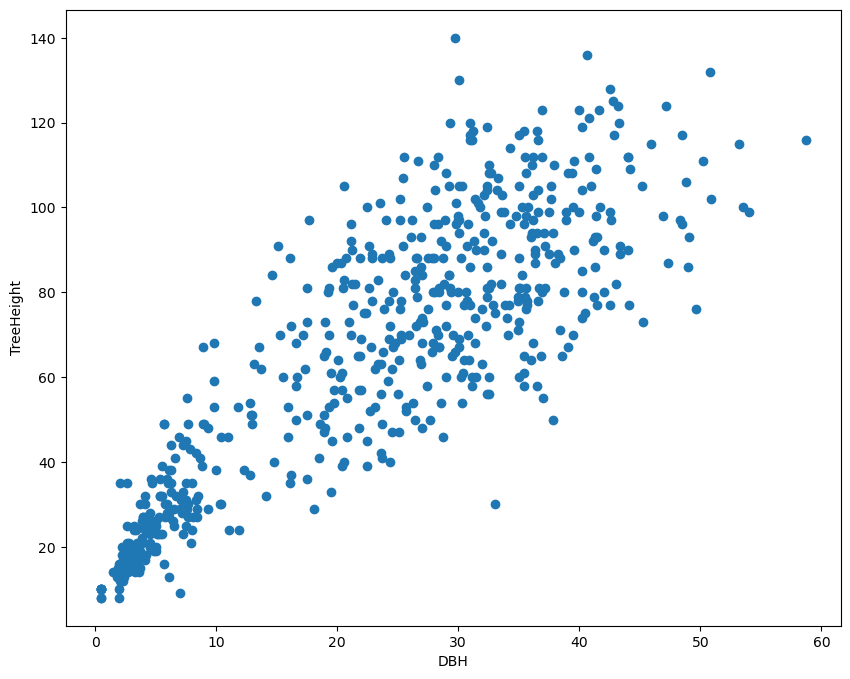

In [37]:
ulmus_scatter = plt.scatter(ulmus_df['DBH'], ulmus_df['TreeHeight'])
plt.xlabel('DBH')
plt.ylabel('TreeHeight')
plt.show(ulmus_scatter)

##### G2: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue (Hint: You will need to use the  “Genus”, “Genus_spec”, “DBH”, and “TreeHeight” attributes.)

In [38]:
ulmus_df_species = df[df['Genus'] == 'Ulmus'][['Genus', 'DBH', 'TreeHeight', 'Genus_spec']]
ulmus_df_species.head(5)

,Genus,DBH,TreeHeight,Genus_spec
57,Ulmus,40.5,75.0,Ulmus pumila
58,Ulmus,48.5,96.0,Ulmus pumila
59,Ulmus,34.0,74.0,Ulmus pumila
60,Ulmus,35.0,60.0,Ulmus pumila
63,Ulmus,35.5,79.0,Ulmus pumila


In [39]:
import seaborn as sns

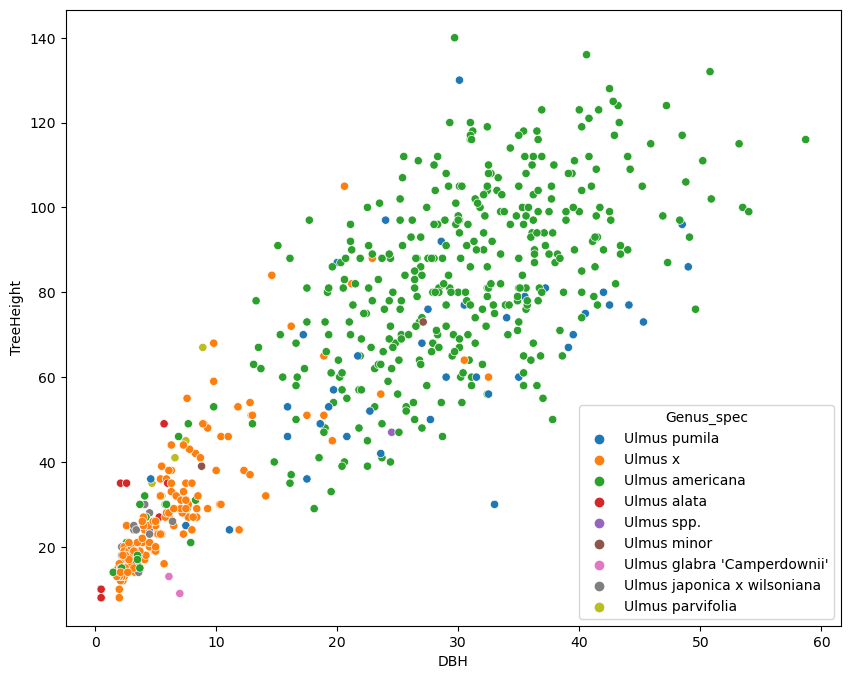

In [40]:
ulmus_scatter2 = sns.scatterplot(x='DBH', y='TreeHeight', hue='Genus_spec', data=ulmus_df_species)
plt.xlabel('DBH')
plt.ylabel('TreeHeight')
plt.show(ulmus_scatter2)

##### G3: Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species should have its own boxplot)

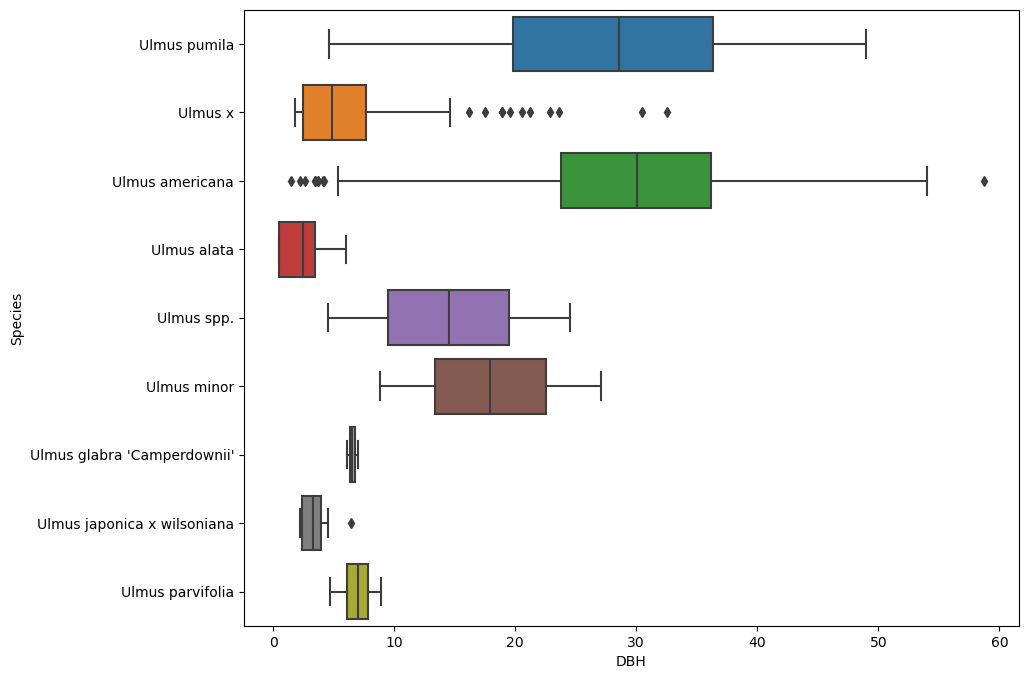

In [41]:
ulmus_boxplot = sns.boxplot(x='DBH', y='Genus_spec', data=ulmus_df_species)
plt.xlabel('DBH')
plt.ylabel('Species')
plt.show(ulmus_boxplot)

##### G4: Combine Graphs 1 and 3 into a single figure. Do not plot a legend for any of the graphs

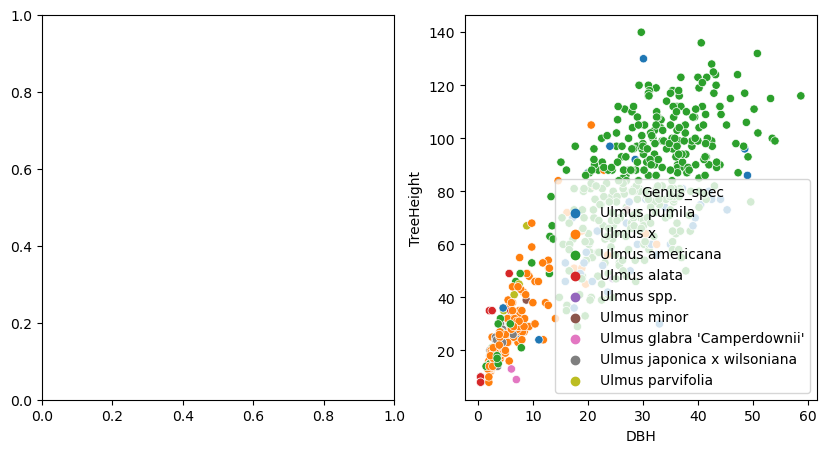

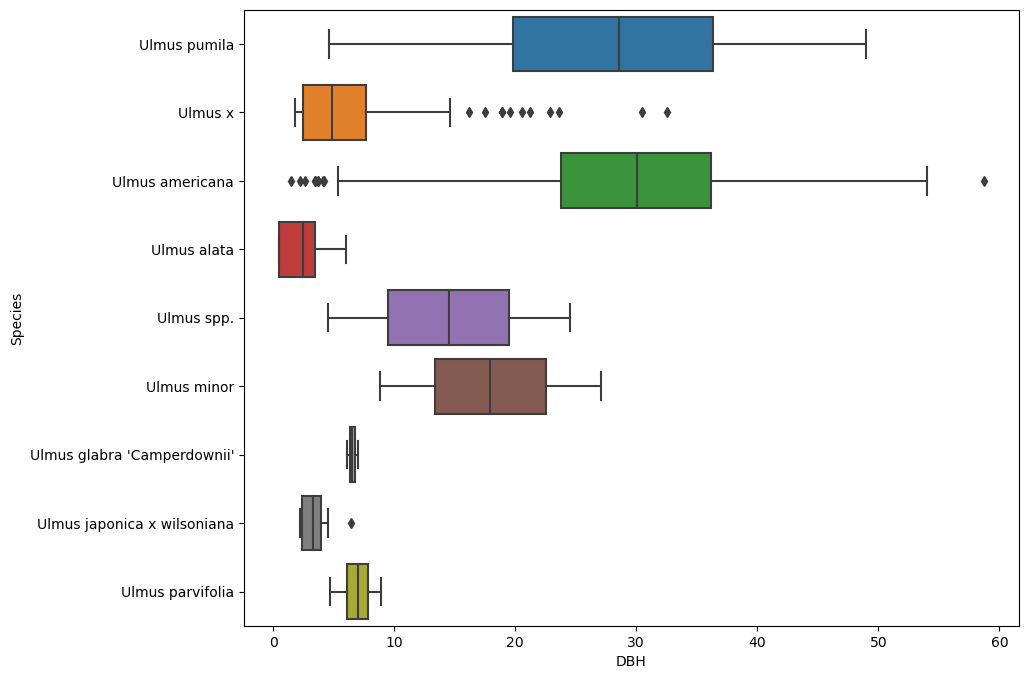

<Figure size 1000x800 with 0 Axes>

In [49]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10,5))

ulmus_scatter2 = sns.scatterplot(x='DBH', y='TreeHeight', hue='Genus_spec', data=ulmus_df_species)
plt.xlabel('DBH')
plt.ylabel('TreeHeight')
plt.show(ulmus_scatter2)
axes[0].set_title('Scatterplot')

ulmus_boxplot = sns.boxplot(x='DBH', y='Genus_spec', data=ulmus_df_species)
plt.xlabel('DBH')
plt.ylabel('Species')
plt.show(ulmus_boxplot)
axes[1].set_title('Boxplot')

plt.tight_layout()
plt.show()

#### Part 4: Python GeoPandas

##### Task 1: Read the dataset(shapefile) you download as GeoPandas DataFrame

In [ ]:
pip install geopandas

In [ ]:
pip install fiona

In [ ]:
pip install shapely

In [ ]:
pip install pyproj

In [ ]:
pip install rtree

In [ ]:
pip install contextily

In [ ]:
pip install folium

In [ ]:
pip install matplotlib

In [ ]:
pip install mapclassify

In [16]:
import geopandas as gpd

In [17]:
dataset = '/arcgis/home/Forgotten_Woodlands/CCFW_SCOTLAND.shp'
woodlands = gpd.read_file('/arcgis/home/Forgotten_Woodlands/CCFW_SCOTLAND.shp')

<AxesSubplot: >

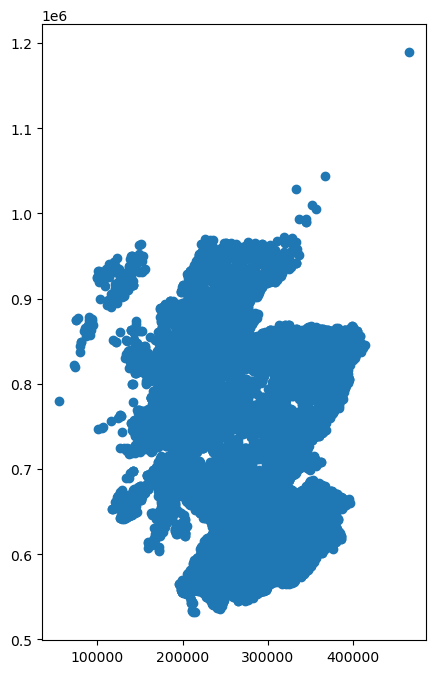

In [53]:
woodlands.plot()

##### Task 2: Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset.

In [54]:
woodlands.head(5)

,NAME,GRID_REF,SOURCE,CERTAINTY,LANGUAGE,ELEMENT,SPECIFICIT,TERM,EASTING,NORTHING,AWI_MAP_OR,ALTITUDE,ASPECT,geometry
0,Balbirnie Wood,NO342127,gb1900,1.0,Scots,wood,generic,wood,334250.0,712750.0,None,64.400002,163.178589,POINT (3.34e+05 7.13e+05)
1,Balcormo Wood,NO408059,gb1900,1.0,Scots,wood,generic,wood,340850.0,705950.0,LEPO1860,110.000000,41.099567,POINT (3.41e+05 7.06e+05)
2,Baldragon Wood,NO366348,gb1900,1.0,Scots,wood,generic,wood,336650.0,734850.0,LEPO1860,156.600006,163.249710,POINT (3.37e+05 7.35e+05)
3,Balgarricks Wood,NT058990,gb1900,1.0,Scots,wood,generic,wood,305850.0,699050.0,LEPO1860,171.000000,12.346369,POINT (3.06e+05 6.99e+05)
4,Balgownie Wood,NS985883,gb1900,1.0,Scots,wood,generic,wood,298550.0,688350.0,LEPO1860,57.599998,42.436237,POINT (2.99e+05 6.88e+05)


In [55]:
woodlands.tail(5)

,NAME,GRID_REF,SOURCE,CERTAINTY,LANGUAGE,ELEMENT,SPECIFICIT,TERM,EASTING,NORTHING,AWI_MAP_OR,ALTITUDE,ASPECT,geometry
15723,towie wood,NJ529639,gb1900,1.0,Scots,wood,generic,wood,352950.0,863950.0,LEPO1860,90.500000,277.414642,POINT (3.53e+05 8.64e+05)
15724,Tulloch Loch wood,NJ074550,gb1900,1.0,Scots,wood,generic,wood,307450.0,855050.0,LEPO1860,91.099998,11.309988,POINT (3.07e+05 8.55e+05)
15725,Upper Mains Wood,NJ274428,gb1900,1.0,Scots,wood,generic,wood,327450.0,842850.0,None,146.800003,308.867798,POINT (3.27e+05 8.43e+05)
15726,wester newforres wood,NJ062576,gb1900,1.0,Scots,wood,generic,wood,306250.0,857650.0,LEPO1860,71.800003,67.570839,POINT (3.06e+05 8.58e+05)
15727,Whitehead wood,NJ495519,gb1900,1.0,Scots,wood,generic,wood,349550.0,851950.0,LEPO1860,105.900002,289.788818,POINT (3.5e+05 8.52e+05)


<AxesSubplot: >

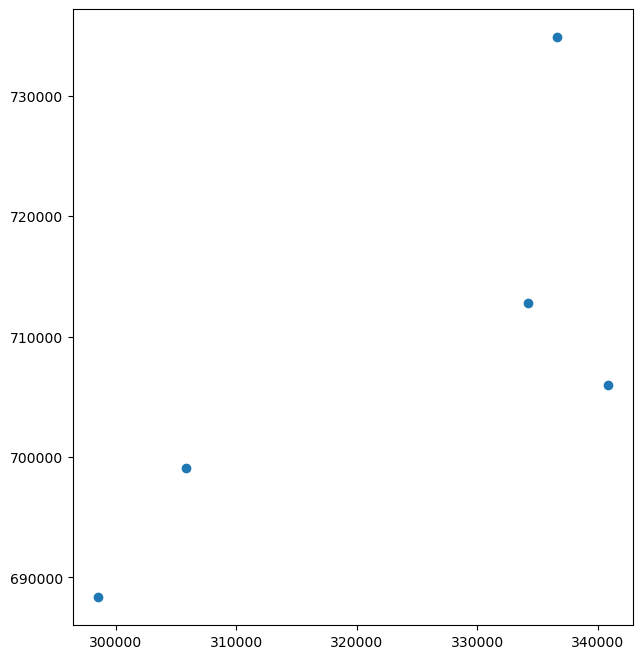

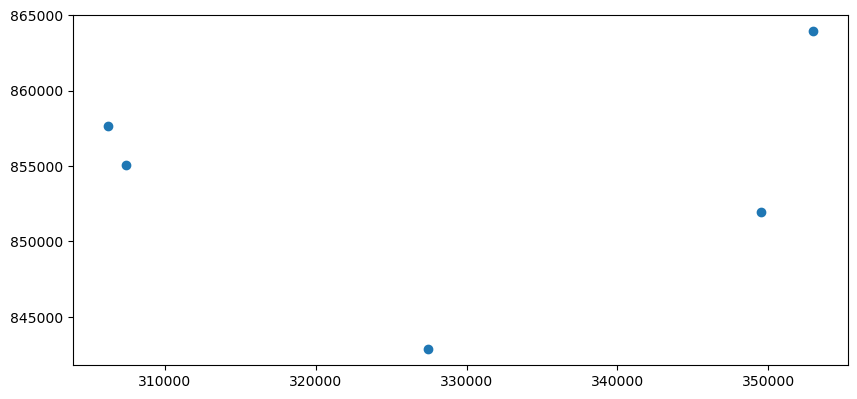

In [56]:
woodlands.head(5).plot()
woodlands.tail(5).plot()

##### Task 3: Create a map where you can explore the selected dataset. Try to plot the map using some  categorical attribute. Include a ToolTip.

i tried to do woodlands.explore() here but it crashed my upload to GitHub and my map wouldn't show up.
the code I had put was woodland.explore().

##### Task 4: What is the Coordinate Reference System of the selected dataset?

<AxesSubplot: >

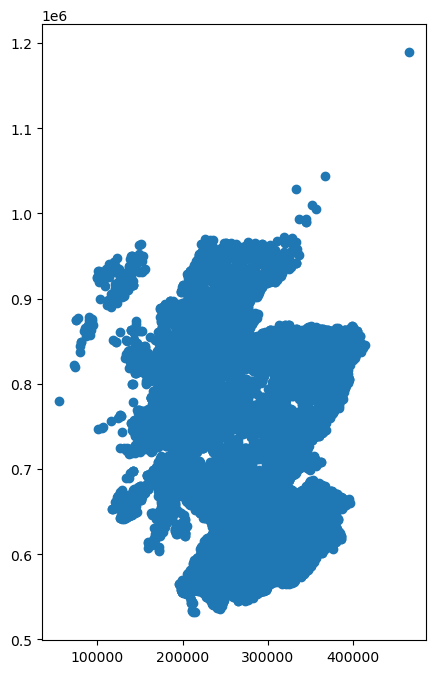

In [58]:
woodlands_prj = gpd.read_file('/arcgis/home/Forgotten_Woodlands/CCFW_SCOTLAND.shp')
woodlands_prj.plot()

In [59]:
woodlands_prj.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

##### Task 5: How many features does the selected dataset contain?

In [60]:
n_feat = woodlands.shape[0]
print('The shapefile contains', n_feat, "features.")

The shapefile contains 15728 features.


##### Task 6: Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a categorical attribute.

In [61]:
woodlands_prj.columns

Index(['NAME', 'GRID_REF', 'SOURCE', 'CERTAINTY', 'LANGUAGE', 'ELEMENT',
       'SPECIFICIT', 'TERM', 'EASTING', 'NORTHING', 'AWI_MAP_OR', 'ALTITUDE',
       'ASPECT', 'geometry'],
      dtype='object')

In [62]:
woodlands_prj.head

<bound method NDFrame.head of                         NAME  GRID_REF  SOURCE  CERTAINTY LANGUAGE ELEMENT  \
0             Balbirnie Wood  NO342127  gb1900        1.0    Scots    wood   
1              Balcormo Wood  NO408059  gb1900        1.0    Scots    wood   
2             Baldragon Wood  NO366348  gb1900        1.0    Scots    wood   
3           Balgarricks Wood  NT058990  gb1900        1.0    Scots    wood   
4             Balgownie Wood  NS985883  gb1900        1.0    Scots    wood   
...                      ...       ...     ...        ...      ...     ...   
15723             towie wood  NJ529639  gb1900        1.0    Scots    wood   
15724      Tulloch Loch wood  NJ074550  gb1900        1.0    Scots    wood   
15725       Upper Mains Wood  NJ274428  gb1900        1.0    Scots    wood   
15726  wester newforres wood  NJ062576  gb1900        1.0    Scots    wood   
15727         Whitehead wood  NJ495519  gb1900        1.0    Scots    wood   

      SPECIFICIT  TERM   EASTING 

In [63]:
woodlands_prj.shape

(15728, 14)

In [64]:
woodlands_wood = woodlands_prj[woodlands_prj['TERM'] == 'wood']
woodlands_wood.head(5)

,NAME,GRID_REF,SOURCE,CERTAINTY,LANGUAGE,ELEMENT,SPECIFICIT,TERM,EASTING,NORTHING,AWI_MAP_OR,ALTITUDE,ASPECT,geometry
0,Balbirnie Wood,NO342127,gb1900,1.0,Scots,wood,generic,wood,334250.0,712750.0,None,64.400002,163.178589,POINT (3.34e+05 7.13e+05)
1,Balcormo Wood,NO408059,gb1900,1.0,Scots,wood,generic,wood,340850.0,705950.0,LEPO1860,110.000000,41.099567,POINT (3.41e+05 7.06e+05)
2,Baldragon Wood,NO366348,gb1900,1.0,Scots,wood,generic,wood,336650.0,734850.0,LEPO1860,156.600006,163.249710,POINT (3.37e+05 7.35e+05)
3,Balgarricks Wood,NT058990,gb1900,1.0,Scots,wood,generic,wood,305850.0,699050.0,LEPO1860,171.000000,12.346369,POINT (3.06e+05 6.99e+05)
4,Balgownie Wood,NS985883,gb1900,1.0,Scots,wood,generic,wood,298550.0,688350.0,LEPO1860,57.599998,42.436237,POINT (2.99e+05 6.88e+05)


In [65]:
woodlands_wood.shape

(7015, 14)

##### Task 7: Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a numerical attribute

In [66]:
import matplotlib.pyplot as plt

In [67]:
woodlands_highalt = woodlands_prj[woodlands_prj['ALTITUDE'] > 800]
woodlands_highalt.head(5)

,NAME,GRID_REF,SOURCE,CERTAINTY,LANGUAGE,ELEMENT,SPECIFICIT,TERM,EASTING,NORTHING,AWI_MAP_OR,ALTITUDE,ASPECT,geometry
1826,Coire nan Dearcag,NN770865,GB1900,1.0,Gaelic,dearc(ag),indicative,berry,277050.0,786550.0,None,815.099976,7.614170,POINT (2.77e+05 7.87e+05)
1827,Bealach Coire nan Dearcag,NN770861,GB1900,1.0,Gaelic,dearc(ag),indicative,berry,277050.0,786150.0,None,839.900024,230.951447,POINT (2.77e+05 7.86e+05)
1828,Mullach Coire nan Dearcag,NN774863,GB1900,1.0,Gaelic,dearc(ag),indicative,berry,277450.0,786350.0,None,851.000000,327.738678,POINT (2.77e+05 7.86e+05)
1837,Meall Creagan Dearcaig,NO191853,GB1900,1.0,Gaelic,dearc(ag),indicative,berry,319150.0,785350.0,None,802.200012,62.055252,POINT (3.19e+05 7.85e+05)
2027,Braigh Coire an Stuic Ghiubhais,NN910823,gb1900,1.0,Gaelic,giuthas,specific,pine,291050.0,782350.0,None,817.500000,254.729507,POINT (2.91e+05 7.82e+05)


In [68]:
woodlands_highalt.shape

(54, 14)

##### Task 8: Plot the new/filtered geopandas dataframe using one of the attributes to create a choropleth map.

<AxesSubplot: >

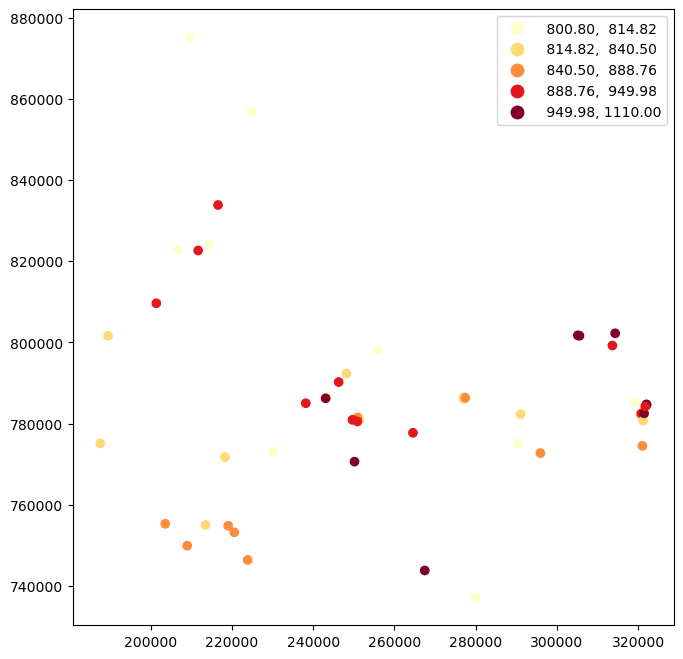

In [69]:
woodlands_highalt.plot(column="ALTITUDE", cmap="YlOrRd", scheme ="quantiles", legend = True)

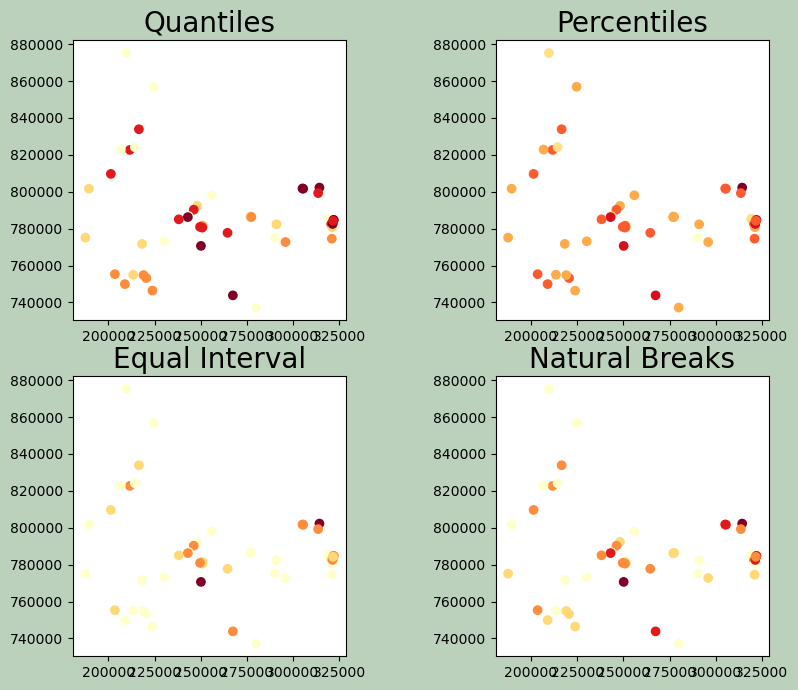

In [70]:
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(2, 2)
woodlands_highalt.plot(column="ALTITUDE", ax=ax[0,0], cmap="YlOrRd", scheme="Quantiles")
ax[0,0].set_title("Quantiles", fontsize=20, color="#000000")
woodlands_highalt.plot(column="ALTITUDE", ax=ax[0,1], cmap="YlOrRd", scheme="Percentiles")
ax[0,1].set_title("Percentiles", fontsize=20, color="#000000")
woodlands_highalt.plot(column="ALTITUDE", ax=ax[1,0], cmap="YlOrRd", scheme="EqualInterval")
ax[1,0].set_title("Equal Interval", fontsize=20, color="#000000")
woodlands_highalt.plot(column="ALTITUDE", ax=ax[1,1], cmap="YlOrRd", scheme="NaturalBreaks")
ax[1,1].set_title("Natural Breaks", fontsize=20, color="#000000")
fig.patch.set_facecolor('#bcd1bc')

#### Part 5: Python Rasterrio

##### Task 1: Read the file as a rasterio dataset

In [71]:
dataset = '/arcgis/home/assignment2/elev.tif'

In [72]:
import rasterio as rio
from rasterio import plot

plt.rcParams['figure.figsize'] = [10,8]

In [73]:
elev = rio.open('/arcgis/home/assignment2/elev.tif')
print(elev.name)
print(elev.count)
print(elev.width)
print(elev.height)
print(elev.bounds)
print(elev.crs)

/arcgis/home/assignment2/elev.tif
1
6303
5897
BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
EPSG:32617


##### Task 2: What is the CRS of the dataset?

In [91]:
print('The CRS of the dataset is', elev.crs)

The CRS of the dataset is EPSG:32617


##### Task 3: Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset.

In [75]:
import numpy as np

In [76]:
elev_arr = elev.read(1)
elev_arr

array([[-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       ...,
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ..., -32768, -32768, -32768]], dtype=int16)

In [77]:
elev.shape

(5897, 6303)

In [78]:
print(elev_arr.max)
print(elev_arr.min)
print(elev_arr.mean)

<built-in method max of numpy.ndarray object at 0x7f8c5605c750>
<built-in method min of numpy.ndarray object at 0x7f8c5605c750>
<built-in method mean of numpy.ndarray object at 0x7f8c5605c750>


In [79]:
image_read_masked = np.ma.masked_array(elev_arr, mask=(elev_arr == 0))

##### Task 4: Create a plot/map of the raster dataset.

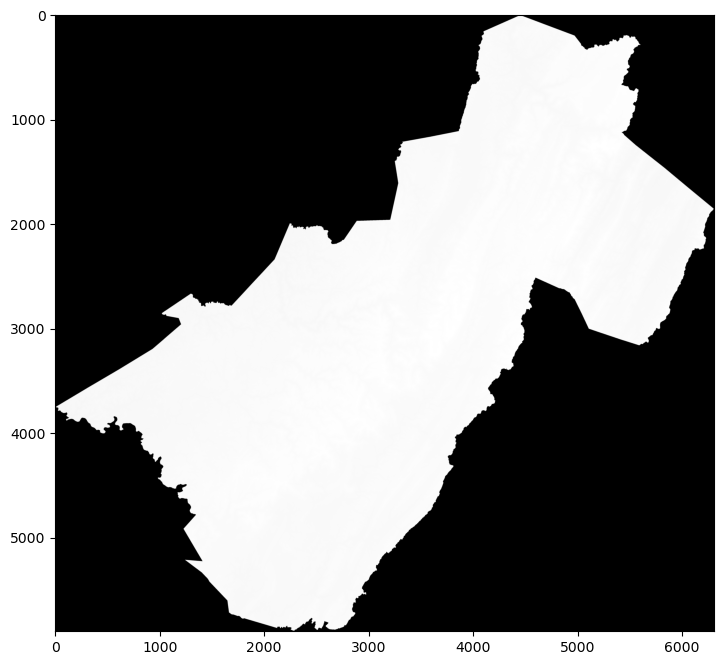

In [80]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(image_read_masked, cmap="gist_gray")

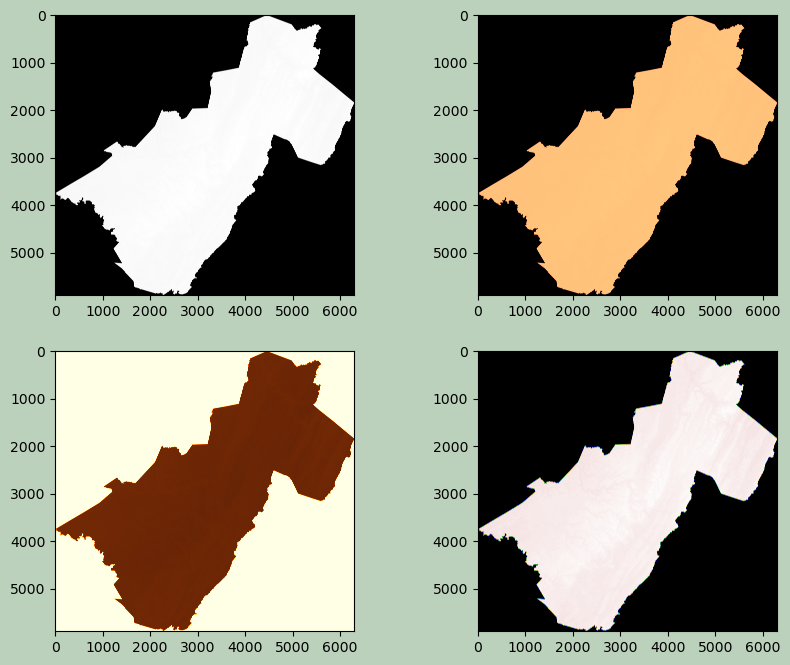

In [81]:
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(image_read_masked, cmap="gist_gray")
ax[0,1].imshow(image_read_masked, cmap="copper")
ax[1,0].imshow(image_read_masked, cmap="YlOrBr")
ax[1,1].imshow(image_read_masked, cmap="gist_earth")
fig.patch.set_facecolor('#bcd1bc')

##### Task 5: Create Histograms from the raster.

In [ ]:
pip install earthpy

In [85]:
from rasterio.plot import show_hist

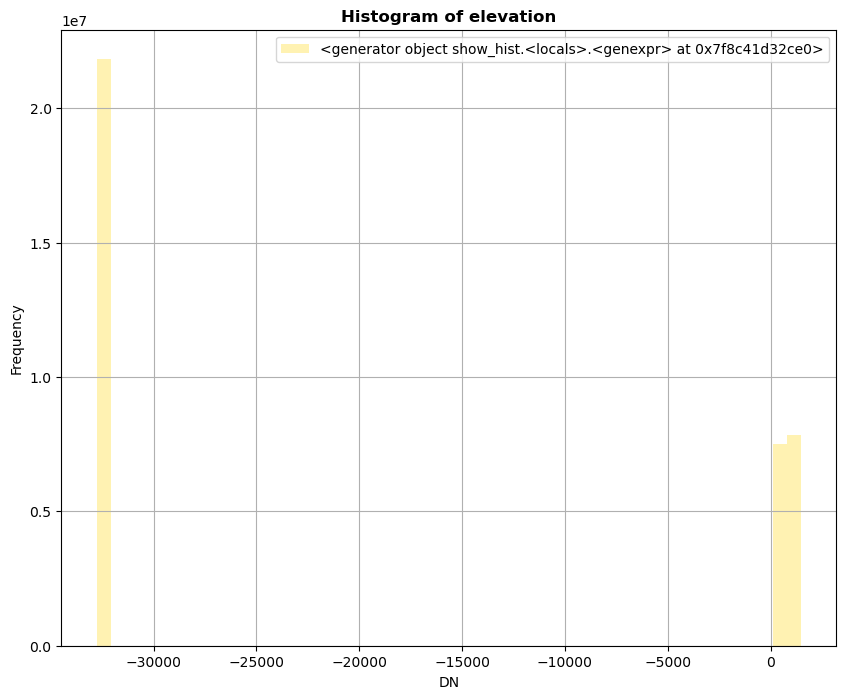

In [86]:
show_hist(elev_arr, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title = 'Histogram of elevation')